# Homework 2 MLE and Naive Bayes

Import needed libraries

In [822]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as stats
from collections import defaultdict 
import sys

## Chapter 01

### MLE

1.MLE for stock pricing prediction model parameters $ \alpha $ of a model $ y_{n+1} = \alpha y_n + w_n $

**Note:** We need to find the parameters ($ \alpha $) which is has a Maximum likelihood with (can represent) the random variables $ y_2, y_1, y_0 $

- every noises are Independent and Identical Distribited which represented by $ \mathcal{N}(0, \sigma^2) $
- $ y_0 $ is independent and represented by $ \mathcal{N}(0, \lambda) $

So, we can state the likelyhood function as follows:

$ L(\alpha) = p(y_2 | y_1 ; \alpha) \cdot p(y_1 | y_0 ; \alpha) \cdot p(y_0) $

$ ln{(L(\alpha))} = \sum_{i=1}^2 [\ln \frac{1}{\sigma \sqrt{2 \pi}} - \frac{(y_n - \alpha y_{n-1})^2}{2 \sigma^2} \ln{e}] + [\ln \frac{1}{\lambda \sqrt{2 \pi}} - \frac{y_0^2}{2 \lambda^2} \ln{e}]$

So, to maximize we this function. We will take a derivative of likelihood to get the rate of change of the likelihood ($ l'(\alpha) $). Then, we will make it equal to zero to find the parameters which maximize the likelihood of the proposed model.

$ l'(\alpha) = \frac{d}{d\alpha} ln{(L(\alpha))}$

$ l'(\alpha) = - \sum_{i=1}^n \frac{2}{2\sigma^2} (y_n - \alpha y_{n-1})(-y_{n-1}) $

since we interesting in $y2, y1, y0$ thus n = 2, we will get the equation as follows:

$ l'(\alpha) = - \frac{1}{\sigma^2} (y_1 - \alpha y_0)(-y_0) - \frac{1}{\sigma^2}(y_2 - \alpha y_1)(-y_1) $

$ 0 = \frac{1}{\sigma^2}(y_1 y_0 - \alpha y_0^2 + y_1 y_2 - \alpha y_1^2)  $

$ 0 = y_1 (y_0 + y_2) - \alpha (y_0^2 + y_1^2) $

$ \alpha = \frac{(y_0 + y_2)(y_1)}{y_0^2 + y_1^2} $


### Bayes Classifier

Cat emotion (happy or sad) classification using Bayes classifier, given the likelihood probabilities for happy and sad cat as follows:

happy: $ p(x | w_1) = \mathcal{N}(5, 2) $

sad: $ p(x | w_2) = \mathcal{N}(0, 2) $

$ x $ is the amount of food the cat ate that day

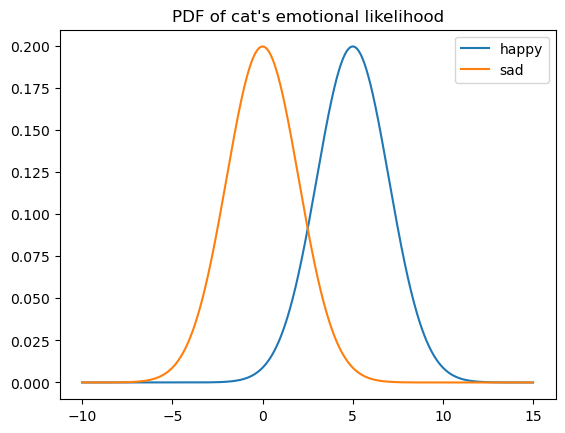

In [823]:
# consider the x_axis value from -10 to 15 with 0.01 step
x_axis = np.arange(-10,15,0.01)
happy_cat_likelihood_pdf = stats.norm.pdf(x_axis, 5, 2)
sad_cat_likelihood_pdf = stats.norm.pdf(x_axis, 0., 2)

plt.plot(x_axis, happy_cat_likelihood_pdf) 
plt.plot(x_axis, sad_cat_likelihood_pdf)
plt.title("PDF of cat's emotional likelihood")
plt.legend(["happy", "sad"])
plt.show()

2.Assuming the prior probability $ p(w_i) $ of each class is the same, plot the posteriors of the two classes on the same axis. From the prior information, to find the posterior, we should find evidence of each class $ p(x) $ and the assumption implies that $ p(w_1) = p(w_2) = \frac{1}{2} $.

The evidence can be calculated by:

$ p(x) = \sum p(x|w) \cdot p(w) $ 

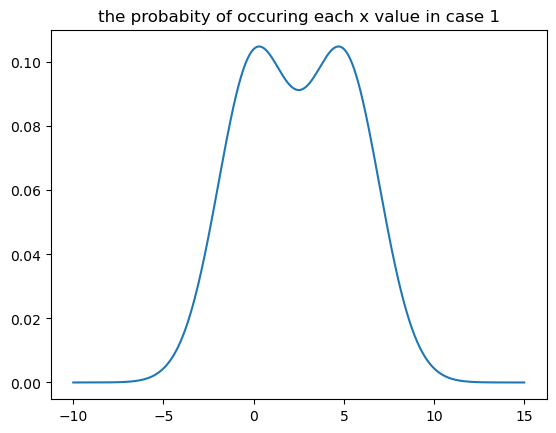

In [824]:
p_happy_cat_case1 = 0.5
p_sad_cat_case1 = 0.5

evidence_case1 = happy_cat_likelihood_pdf*p_happy_cat_case1 + sad_cat_likelihood_pdf*p_sad_cat_case1
plt.plot(x_axis, evidence_case1)
plt.title("the probabity of occuring each x value in case 1")
plt.show()


Then, we could calculate posterior by following relation:

$ P(w|x_i) = \frac{p(x|w_i)p(w_i)}{p(x)} $

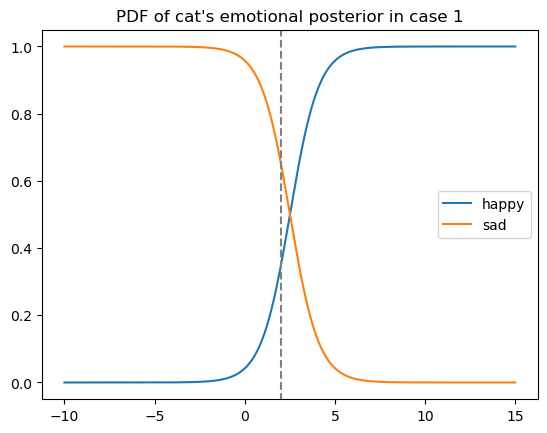

In [825]:
happy_cat_posterior_pdf_case1 = happy_cat_likelihood_pdf*p_happy_cat_case1/evidence_case1
sad_cat_posterior_pdf_case1 = sad_cat_likelihood_pdf*p_sad_cat_case1/evidence_case1

x, y = [2, 2], [-1, 1.2]

plt.plot(x_axis, happy_cat_posterior_pdf_case1) 
plt.plot(x_axis, sad_cat_posterior_pdf_case1)
plt.plot(x, y, linestyle='--', color='grey')
plt.ylim([-0.05, 1.05])
plt.title("PDF of cat's emotional posterior in case 1")
plt.legend(["happy", "sad"])
plt.show()

From the posterior information in case 1, when $ x<2 $ we found that the probability of getting target class as **sad cat** given a parameter $ x $ (the amount of food the cat ate that day) always higher. So, **the result is sad cat**. 

3.If the happy cat has a prior probability $ p(w_1) $ of 0.8, what happen with $ x<2 $.

Initially, we know that $ p(w_2) = 1 - 0.8 = 0.2 $. We need to recalculate the evidence and posterior. 

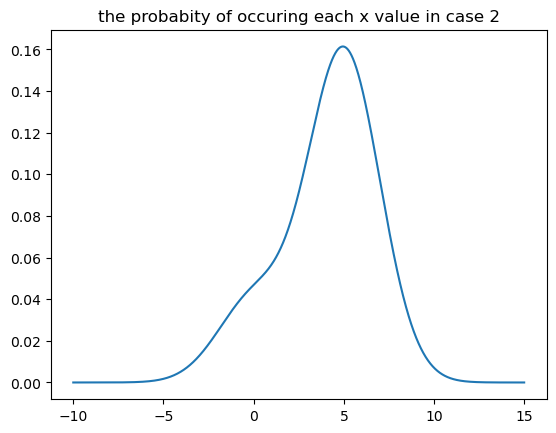

In [826]:
p_happy_cat_case2 = 0.8
p_sad_cat_case2 = 0.2

evidence_case2 = happy_cat_likelihood_pdf*p_happy_cat_case2 + sad_cat_likelihood_pdf*p_sad_cat_case2
plt.plot(x_axis, evidence_case2)
plt.title("the probabity of occuring each x value in case 2")
plt.show()

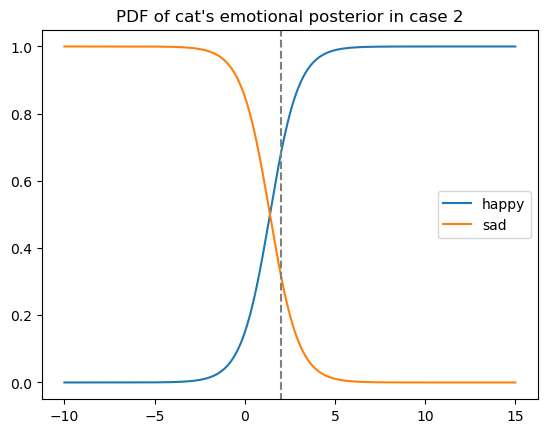

In [827]:
happy_cat_posterior_pdf_case2 = happy_cat_likelihood_pdf*p_happy_cat_case2/evidence_case2
sad_cat_posterior_pdf_case2 = sad_cat_likelihood_pdf*p_sad_cat_case2/evidence_case2

x, y = [2, 2], [-1, 1.2]

plt.plot(x_axis, happy_cat_posterior_pdf_case2) 
plt.plot(x_axis, sad_cat_posterior_pdf_case2)
plt.plot(x, y, linestyle='--', color='grey')
plt.ylim([-0.05, 1.05])
plt.title("PDF of cat's emotional posterior in case 2")
plt.legend(["happy", "sad"])
plt.show()

From the posterior information in case 2, when $ x<2 $ we found that the probability of getting target class as **happy cat** given a parameter $ x $ (the amount of food the cat ate that day) always higher. So, **the result is changed to happy cat**. 

## Chapter 02

### Importing and exploring dataset

The dataset has total 34 features and we want to predict each employee attrition (leave or stay)

In [828]:
dataset_path = os.path.join('D:\\4thYear', 'secondSemester', 'Pattern Recognition', 'HW', 'HW2', 'dataset','hr-employee-attrition-with-null.csv')
dataset = pd.read_csv(dataset_path)

dataset.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [829]:
dataset_dtypes = dataset.dropna().dtypes
dataset_dtypes

Unnamed: 0                    int64
Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

In [830]:
dataset.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Data cleaning

- Encoding categorical data to numerical data including our target class (Attrition).
- Droping the a "EmployeeNumber" and "Unnamed: 0" coloumns.
- Droping other column which has a single class.

In [831]:
dataset_cpy = dataset.copy()

dataset_cpy.loc[dataset_cpy["Attrition"] == "No", "Attrition"] = 0.0
dataset_cpy.loc[dataset_cpy["Attrition"] == "Yes", "Attrition"] = 1.0
dataset_cpy["Attrition"] = dataset_cpy["Attrition"].astype(int)

categorical_features = dataset_cpy.loc[:, dataset_cpy.dtypes == 'object']
print("encoded cols: ", categorical_features.columns)
print("=========================================================================================================")
for col in list(categorical_features.columns):
    encoded_labels, unique_categories = pd.factorize(dataset_cpy[col], use_na_sentinel=True)
    dataset_cpy[col] = encoded_labels
    # print(encoded_labels)
    # print("max", max(encoded_labels))
    # print("min", min(encoded_labels))
    print(col, ": ", unique_categories)
    print("-----------------------------------------------------------------------------------------------------")

encoded cols:  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
BusinessTravel :  Index(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype='object')
-----------------------------------------------------------------------------------------------------
Department :  Index(['Research & Development', 'Sales', 'Human Resources'], dtype='object')
-----------------------------------------------------------------------------------------------------
EducationField :  Index(['Life Sciences', 'Medical', 'Other', 'Marketing', 'Technical Degree',
       'Human Resources'],
      dtype='object')
-----------------------------------------------------------------------------------------------------
Gender :  Index(['Female', 'Male'], dtype='object')
-----------------------------------------------------------------------------------------------------
JobRole :  Index(['Research Scientist', 'Laborat

In [832]:
dataset_cpy = dataset_cpy.drop(columns = ["EmployeeNumber", "EmployeeCount", "StandardHours", "Unnamed: 0", "Over18"])
#HACK
dataset_cpy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,0,NaN,-1,1.0,NaN,0,2.0,0,...,NaN,1.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,0,NaN,NaN,0,3.0,1,...,NaN,4.0,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,NaN,1,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,0,3.0,4.0,0,NaN,0,...,3.0,3.0,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,0,591.0,0,2.0,1.0,1,1.0,1,...,3.0,4.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


Creating a training and testing set of data. The testing set will select 10% of "Yes" and "No" attrition data. This will create a 90% training set and 10% testing set from dataset.

In [833]:
yes_attrition_idx = dataset_cpy.loc[dataset_cpy["Attrition"] == 1.0, "Attrition"]
yes_dataset_length = yes_attrition_idx.size
yes_idx_for_testset = np.array(yes_attrition_idx[0:int(yes_dataset_length*0.1)].index)
print("Yes attrition amount:", yes_idx_for_testset.size)

no_attrition_idx = dataset_cpy.loc[dataset_cpy["Attrition"] == 0.0, "Attrition"]
no_dataset_length = no_attrition_idx.size
no_idx_for_testset = np.array(no_attrition_idx[0:int(no_dataset_length*0.1)].index)
print("No attrition amount:", no_idx_for_testset.size)

print("number of row in testset:", yes_idx_for_testset.size + no_idx_for_testset.size, "rows")
print("number of row in dataset:", dataset_cpy.shape[0], "rows")

print("---------------------------------------")

print("Yes index for testset:\n-", yes_idx_for_testset)
print("No index for testset:\n-", no_idx_for_testset)

Yes attrition amount: 23
No attrition amount: 123
number of row in testset: 146 rows
number of row in dataset: 1470 rows
---------------------------------------
Yes index for testset:
- [  0   2  14  21  24  26  33  34  36  42  45  50  51  69  89 100 102 107
 111 122 124 126 127]
No index for testset:
- [  1   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19  20
  22  23  25  27  28  29  30  31  32  35  37  38  39  40  41  43  44  46
  47  48  49  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  90  91  92  93  94  95  96  97  98  99 101 103 104 105 106
 108 109 110 112 113 114 115 116 117 118 119 120 121 123 125 128 129 130
 131 133 134 135 137 138 139 141 142 143 144 145 146 147 148]


In [834]:
testing_set_idx = np.sort(np.concatenate((yes_idx_for_testset, no_idx_for_testset)))
testing_set = dataset_cpy.loc[list(testing_set_idx)].copy()

print("Testing set shape", testing_set.shape)
testing_set.head()


Testing set shape (146, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1,0,NaN,-1,1.0,NaN,0,2.0,0,...,NaN,1.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,0,-1,279.0,0,NaN,NaN,0,3.0,1,...,NaN,4.0,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,1,-1,1373.0,-1,2.0,2.0,-1,NaN,1,...,3.0,NaN,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,0,1,1392.0,0,3.0,4.0,0,NaN,0,...,3.0,3.0,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,0,0,591.0,0,2.0,1.0,1,1.0,1,...,3.0,4.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


In [835]:
training_set = dataset_cpy.drop(index = list(testing_set_idx)).copy()
print("Training set shape", training_set.shape)
training_set.head()

Training set shape (1324, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
132,31.0,1,0,542.0,-1,20.0,NaN,-1,2.0,0,...,3.0,3.0,1.0,4.0,2.0,3.0,NaN,NaN,2.0,2.0
136,51.0,1,-1,1150.0,0,8.0,NaN,0,1.0,-1,...,3.0,4.0,0.0,18.0,2.0,NaN,NaN,2.0,0.0,3.0
140,32.0,1,0,NaN,0,9.0,NaN,1,NaN,-1,...,4.0,NaN,0.0,10.0,2.0,4.0,5.0,4.0,0.0,4.0
149,NaN,0,-1,1181.0,0,NaN,1.0,-1,NaN,0,...,3.0,4.0,NaN,NaN,3.0,3.0,NaN,NaN,0.0,0.0
150,NaN,0,-1,1395.0,0,26.0,3.0,1,2.0,0,...,3.0,NaN,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0


### Histrogram discretization

Dividing the entire dataset into a finite nuber if bins and normalize it.

1.Observing the histrogram for Age, MonthlyIncome, and DistanceFromHome

In [836]:
training_set_no_nan = training_set[~np.isnan(training_set["Age"])]
training_set_no_nan = training_set_no_nan[~np.isnan(training_set_no_nan["MonthlyIncome"])]
training_set_no_nan = training_set_no_nan[~np.isnan(training_set_no_nan["DistanceFromHome"])]

training_set_no_nan[["Age", "MonthlyIncome", "DistanceFromHome"]]

,Age,MonthlyIncome,DistanceFromHome
132,31.0,4559.0,20.0
136,51.0,10650.0,8.0
140,32.0,4200.0,9.0
152,53.0,2306.0,6.0
156,51.0,6132.0,7.0
...,...,...,...
1459,29.0,4025.0,13.0
1461,50.0,10854.0,28.0
1462,39.0,12031.0,24.0
1466,39.0,9991.0,6.0


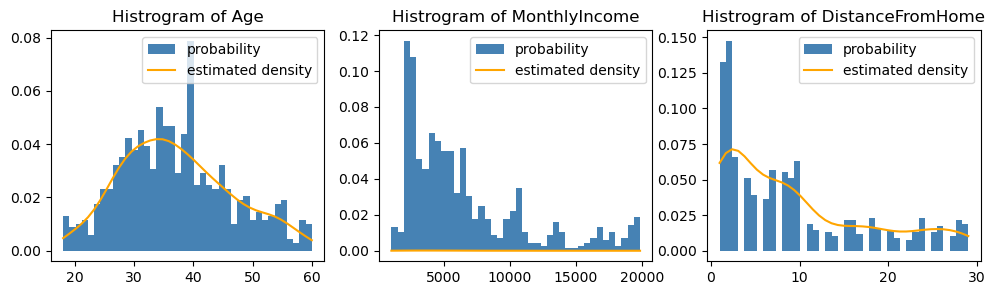

In [837]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
target_feature = ["Age", "MonthlyIncome", "DistanceFromHome"]
for i, ax in enumerate(axs):
    hist, bin_edge = np.histogram(training_set_no_nan[target_feature[i]], 40)
    ax.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2)/training_set_no_nan[target_feature[i]].size, facecolor='steelblue') 
    # hist, bins, _ = ax.hist(training_set_no_nan[target_feature[i]], 40)
    density = stats.gaussian_kde(training_set_no_nan[target_feature[i]])
    # marker_coorditnates = [np.argsort(hist)[::-1][0:5], np.sort(hist)[::-1][0:5]/training_set_no_nan[target_feature[i]].size]
    # print(marker_coorditnates)
    
    ax.plot(bin_edge, density(bin_edge), color='orange')
    ax.set_title("Histrogram of " + target_feature[i])
    # ax.plot(marker_coorditnates[0], marker_coorditnates[1], marker='x')
    ax.legend(["probability", "estimated density"])


From the observation, we find that in "DistanceFromHome" feature has 11 empty bins. So, it's not a good discretization because some random data point will not have a represented probability and cause a ____.

2.Can we use Gaussian to estimate these histrogram? Why? What about a Gaussian Mixture Model (GMM)?

No, because the observed distriution of each features is not a gussian like shape; In addition, kde curve (estimated pdf of each feature) also showed the same trend. But, using GMM might be possible because in both "MonthlyIncome" and "DistanceFromHome" feature seems to have 2 top of the curve as shown in the middle figure and right figure. If we can vary a bins parameters and further observe the data, we will able to ensure our assumption.

3.We will select the most sensible bin size for each feature by plotting the histogram of "Age", "MonthlyIncome", and "DistanceFromHome" with 10, 40, 100 bins. Then, observing the figure.

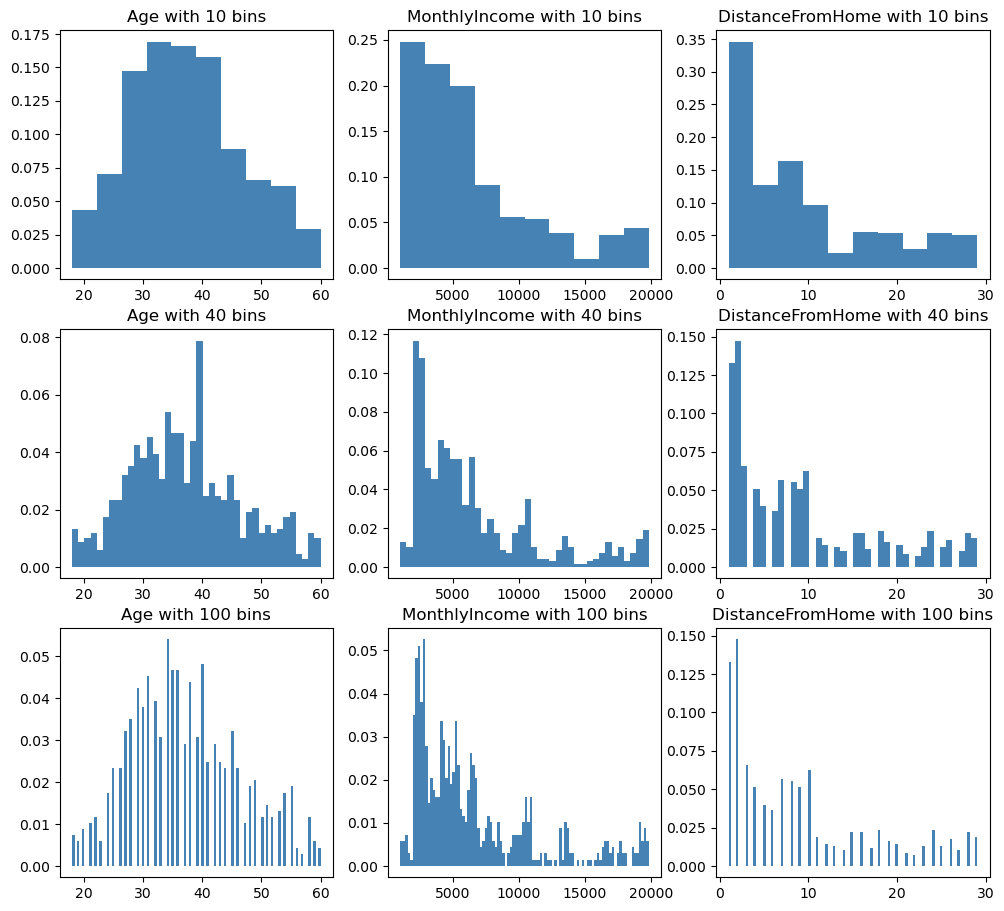

In [838]:
fig, axs = plt.subplots(3, 3, figsize=(12, 11))
target_feature = ["Age", "MonthlyIncome", "DistanceFromHome"]
bin_size = [10, 40, 100]

for i, ax in enumerate(axs.flatten()):
    hist, bin_edge = np.histogram(training_set_no_nan[target_feature[i%3]], bin_size[i//3])
    ax.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2)/training_set_no_nan[target_feature[i%3]].size, facecolor='steelblue') 
    # density = stats.gaussian_kde(training_set_no_nan[target_feature[i%3]])
    
    # ax.plot(bin_edge, density(bin_edge), color='orange')
    ax.set_title(target_feature[i%3] + " with " + str(bin_size[i//3]) + " bins")
    # ax.legend(["probability", "estimated density"])

Using np.digitize and np.bincount for discrtizing feature and getting the frquency and probability distribution of each bins. Note that np.digitize separating bins by reference from the bins edge value and it's need to be lower than that value. So, we can see that index 0 of bins count has 0 count value because there are no value in the dataset which lower than -inf.

Age with 10 bins [sample information]
-----------------------------------------------------------------------------
finite bins edge:  [18.  22.2 26.4 30.6 34.8 39.  43.2 47.4 51.6 55.8 60. ]
infinite bins edge:  [-inf 22.2 26.4 30.6 34.8 39.  43.2 47.4 51.6 55.8  inf]
bins count:  [  0  30  48 101 116 114 108  61  45  42  20]


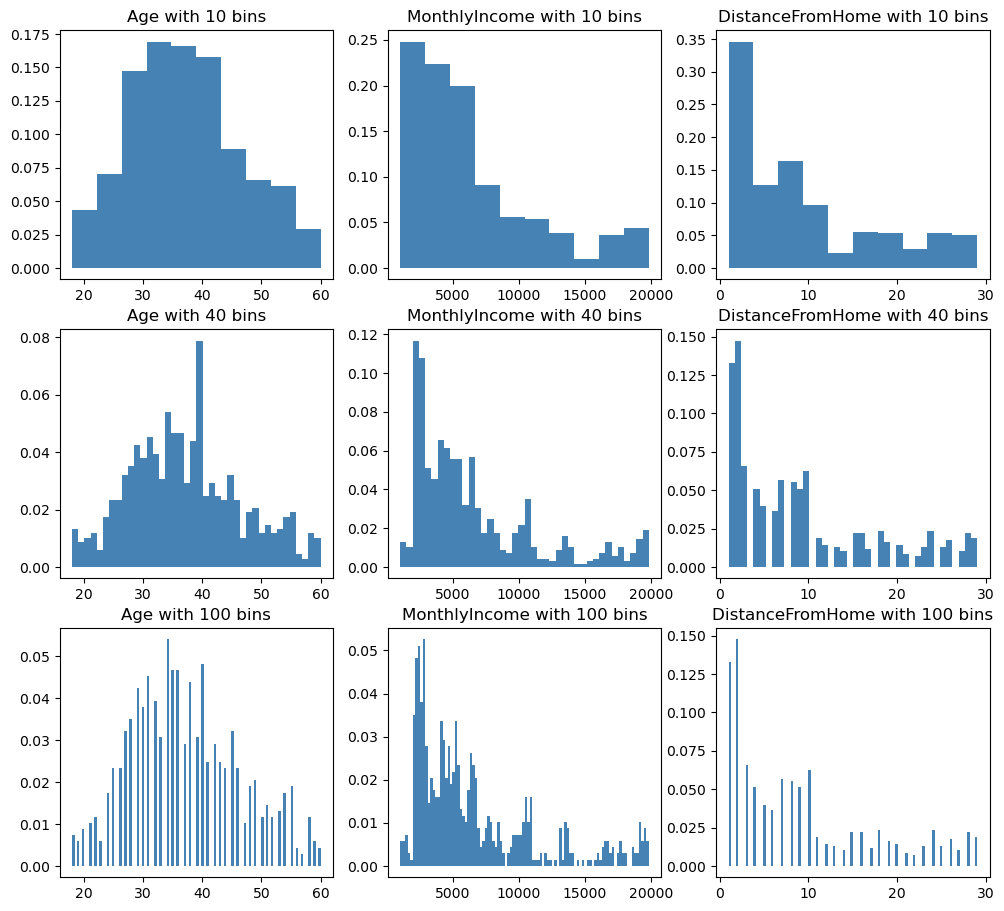

In [839]:
fig, axs = plt.subplots(3, 3, figsize=(12, 11))
target_feature = ["Age", "MonthlyIncome", "DistanceFromHome"]
bin_size = [10, 40, 100]

for i, ax in enumerate(axs.flatten()):
    data_min = min(training_set_no_nan[target_feature[i%3]])
    data_max = max(training_set_no_nan[target_feature[i%3]])
    bins_edge = list(np.linspace(data_min, data_max, num = bin_size[i//3]+1))
    #crate another bins_edge set for covering out of range random variables
    inf_bins_edge = bins_edge.copy()
    inf_bins_edge[-1] = float('inf')
    inf_bins_edge[0] = float('-inf')

    #Selecting bins of data from reference inf_bins_edge
    bins_index = np.digitize(training_set_no_nan[target_feature[i%3]], inf_bins_edge)
    #count the amount of each bins
    frequency_arr = np.bincount(bins_index)
    #calculate the probability of each bins
    prob_arr = frequency_arr/training_set_no_nan[target_feature[i%3]].size

    if i == 0:
        print("Age with 10 bins [sample information]")
        print("-----------------------------------------------------------------------------")
        print("finite bins edge: ", np.array(bins_edge))
        print("infinite bins edge: ", np.array(inf_bins_edge))
        print("bins count: ", frequency_arr)
    
    #plotting a histogram using the bins_edge boundary because the plot required finite value of edge.
    ax.fill_between(np.array(bins_edge).repeat(2)[1:-1], prob_arr[1:].repeat(2), facecolor='steelblue')
    ax.set_title(target_feature[i%3] + " with " + str(bin_size[i//3]) + " bins")


In [840]:
np.linspace(0, 5, num=6)

array([0., 1., 2., 3., 4., 5.])

There are several ways to select the propriate bins value for a feature:
1. **_From our interested_** | Sometimes we can discretize the continuous data from our own interest such as we are interesting in 5 range of customer ages so, we can use 5 as a bins number.
2. **_Mimic the real data_** | Generally, continuous data can be represented by the probability density function (pdf); however, discritize it to a histogram is one of the alternative approach to study about the data and prediction. Thus, to represent the data, higher number of bins is required to complete the objective. The problem which will come along with the large number of bins is the possible empty bins in the small dataset and we need to avoid that because real continuous data should not have any 0 probability case. Moreover, the minimum resolution also worth to discuss to mimic the real data.
3. **_Observation objective_** | In some objective which we want to study the correlation, the density of the data, we could normalize the data first and pick the equal number of bins in each data for analysis.

In this homework, our objective is using a data for predict attrition via Naive Bayes model. So, the best bins parameters from the choices 10, 40, 100 of each feature from observation relies on the ability to mimic the real data which is the highest possible number of bins without having a zero count bins. The parameters is stated below:

<center>

| features        | bins |
| :-------------- | :--: |
| Age             | 40   |
| MonthlyIncome   | 40   |
| DistanceFromHome| 10   |

</center>

From the observation, changing the number of bins from 10 to 40 causing a significant change in the ability to show the probability of the real data. However, from 40 to 100 doesn't effect much and every feature has a empty bins. So, in "Age" and "MonthlyIncome" we will use 40 bins and "DistanceFromHome" 10 bins is used due to the zero count bins in larger number of bins.

4.For the rest of features (Numeric and Category), which one should be discretized in order to modeled by histogram? What are the criterias for the decision?

In [841]:
dataset_dtypes.loc[dataset_dtypes == 'object']

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

In [842]:
dataset_dtypes.loc[~(dataset_dtypes == 'object')]

Unnamed: 0                    int64
Age                         float64
DailyRate                   float64
DistanceFromHome            float64
Education                   float64
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobSatisfaction             float64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
dtype: object

From a datatype observation before data cleaning, we could initial guess the feature's type already. However, there are some categorical data which encoding to the _int_ or _float_ already. So, the extra manual observation is needed.

The method that we will use is the uniqueness observation in numerical data.

In [843]:
observed_df = dataset[list(dataset_dtypes.loc[~(dataset_dtypes == 'object')].index)]
for feature in observed_df:
    print(feature, "unique amount:", len(observed_df[feature].unique()))
    print("---------------------------------------------")

Unnamed: 0 unique amount: 1470
---------------------------------------------
Age unique amount: 44
---------------------------------------------
DailyRate unique amount: 774
---------------------------------------------
DistanceFromHome unique amount: 30
---------------------------------------------
Education unique amount: 6
---------------------------------------------
EmployeeCount unique amount: 2
---------------------------------------------
EmployeeNumber unique amount: 1177
---------------------------------------------
EnvironmentSatisfaction unique amount: 5
---------------------------------------------
HourlyRate unique amount: 72
---------------------------------------------
JobInvolvement unique amount: 5
---------------------------------------------
JobLevel unique amount: 6
---------------------------------------------
JobSatisfaction unique amount: 5
---------------------------------------------
MonthlyIncome unique amount: 1106
-------------------------------------------

From unique observation, we can classify the feature to 2 main types and each type will have their own bins value.
1. The numerical data feature
    
    Calculating the possible bins value which don't cause a zero count, starting from 2 bins and increasing 1 per iteration. **_This type of features needed a discritization_**
2. The category data feature
    
    Starting initial bins at the unique value and observe a zero count. If it has zero count, we will decrease a bins by 1. 

So we seperate the feature in dataset as follows:

- **Numerical data features** (13 features): 

    "Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"

- **Categorical data features** (19 features): 

    "BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime", "EmployeeCount", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance"

To summarize, the critiria for seperate the feature type is a initial observation in raw data type. With this method, we could screen out the clear category data already. Then, we observe a unique in each features. If the unique value more than 10 or that feature can be clearly see that it's a numerical, we will consider it's as numerical. The rest will be categorical.

### Naive Bayes Classifier

Naive Bayes makes a decision according to

<center>

$ H(x) = \frac{p(leave)}{p(stay)} \prod_{n=1}^j \frac{p(x_j | leave)}{p(x_j | stay)} ; n $ is a number of features

</center>

if $ H(x) >= 1 $ the prediction is leave; else, $ H(x) < 1 $ the prediction is stay.

To prevent the floating point underflow, we assigned log to both side of the equation to switch the result to log scale.

<center>

$ \log(H(x)) = \log{p(leave)} - \log{p(stay)} + \sum_{n=1}^j [\log{p(x_j | leave)} + \log{p(x_j | stay)}] $

</center>

if $ H(x) >= 0 $ the prediction is leave; else, $ H(x) < 0 $ the prediction is stay.

In [844]:
class NaiveBayesClassifier:
    def __init__(self, training_set, test_set, target):
        #HACK
        self.feature_type = {
            "num": ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", 
                    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", 
                    "TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", 
                    "YearsWithCurrManager"],
            "cat": ["BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobRole", "MaritalStatus", 
                    "OverTime", "EmployeeCount", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", 
                    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", 
                    "StockOptionLevel", "TrainingTimesLastYear", "WorkLifeBalance"]
        }
        self.max_n_bins = 100
        self.min_n_bins = 2
        
        self.target_information = defaultdict()
        self.target = target
        self.df_train = training_set.copy()
        self.df_test = test_set.drop(columns=self.target).copy()
        self.df_ground_truth = test_set[self.target].copy()
        self.target_prob = self.calculate_target_prob()
        self.look_up_table = self.calulate_look_up_table()
        

    def calculate_target_prob(self):
        target_prob = defaultdict()
        target_unique, target_count = np.unique(self.df_train[self.target].values, return_counts=True)
        # print(target_unique, target_count)
        for idx, unique in enumerate(target_unique):
            target_prob["{}".format(unique)] = target_count[idx]/sum(target_count)
        return target_prob

    def calulate_look_up_table(self):
        look_up_table = defaultdict()
        for feature in self.df_train.columns:
            if feature in [self.target, 'EmployeeCount', 'Over18', 'StandardHours']: continue
            print(feature, end =": ")
            features_histogram_params = self.calculate_histogram_params(feature)
            print("params: ", features_histogram_params)
            look_up_table[feature] = {
                "bins_val": features_histogram_params[0],
                "bins_edge": features_histogram_params[1],
                "bins_prob": features_histogram_params[2]
            }

        return look_up_table
    
    def calculate_histogram_params(self, feature):
        # np.set_printoptions(threshold=sys.maxsize)
        keys_list = list(self.target_prob.keys())
        df_train_drop_na = self.df_train[[feature, self.target]].copy().dropna()

        if feature in self.feature_type["num"]:
            data_min, data_max = min(df_train_drop_na[feature]), max(df_train_drop_na[feature])
            bins_val_arr = np.linspace(self.min_n_bins, self.max_n_bins, 
                                        num=self.max_n_bins-self.min_n_bins+1, dtype=int)
            for bins_val in bins_val_arr:
                bins_edge = list(np.linspace(data_min, data_max, num = bins_val+1))
                bins_edge[0] = -np.inf
                bins_edge[-1] = np.inf

                training_bins_index = [].copy()
                training_bins_freq_arr = [].copy()
                training_bins_prob = [].copy()
                
                for i in range(len(keys_list)):
                    #Selecting bins of data from reference inf_bins_edge
                    training_bins_index.append(np.digitize(df_train_drop_na.loc[df_train_drop_na[self.target] == int(keys_list[i]), feature].copy()
                                                        , bins_edge, right=False))
                    #count the amount of each bins
                    training_bins_freq_arr.append(list(np.bincount(training_bins_index[i], minlength=bins_val+1)))
                    training_bins_freq_arr[i].pop(0)
                    #probability of each bins in training set
                    training_bins_prob.append((np.array(training_bins_freq_arr[i])/df_train_drop_na.loc[df_train_drop_na[self.target] == int(keys_list[i]), feature].size).tolist())

                # print(training_bins_freq_arr)
                # print(bins_val, len(training_bins_freq_arr[0]), len(training_bins_freq_arr[1]))
                #if the bins increased and got a zero count in training or test set, we will use last bins val
                if np.any(np.array(training_bins_freq_arr) == 0):
                    print("pass")
                    return [bins_val - 1, list(np.linspace(data_min, data_max, num = bins_val)), training_bins_prob]

        elif feature in self.feature_type["cat"]:
            data_min, data_max = min(df_train_drop_na[feature]), max(df_train_drop_na[feature])
            unique_n = len(df_train_drop_na[feature].unique())
            bins_val_arr = np.linspace(unique_n, self.min_n_bins, num = unique_n - self.min_n_bins + 1, dtype=int)
            for bins_val in bins_val_arr:
                bins_edge = list(np.linspace(data_min, data_max, num = bins_val + 1))
                bins_edge[0] = -np.inf
                bins_edge[-1] = np.inf

                training_bins_index = [].copy()
                training_bins_freq_arr = [].copy()
                training_bins_prob = [].copy()

                for i in range(len(keys_list)):
                    #Selecting bins of data from reference inf_bins_edge
                    training_bins_index.append(np.digitize(df_train_drop_na.loc[df_train_drop_na[self.target] == int(keys_list[i]), feature].copy()
                                                        , bins_edge, right=False))
                    #count the amount of each bins
                    training_bins_freq_arr.append(list(np.bincount(training_bins_index[i], minlength=bins_val+1)))
                    training_bins_freq_arr[i].pop(0)
                    #probability of each bins in training set
                    training_bins_prob.append((np.array(training_bins_freq_arr[i])/df_train_drop_na.loc[df_train_drop_na[self.target] == int(keys_list[i]), feature].size).tolist())
                
                # print(bins_edge)
                # print(training_bins_freq_arr)
                # print(bins_val, len(training_bins_freq_arr[0]), len(training_bins_freq_arr[1]))
                #if the bins decrease and got no zero count in both training and test set, we will use that value
                if np.all(np.array(training_bins_freq_arr) != 0):
                    print("pass")
                    return [bins_val, bins_edge, training_bins_prob]
        else:
            print("no", feature, "feature")

    def predict(self):
        # prediction = np.zeros(len(self.df_test.index), dtype=float)
        prediction = [].copy()
        for row_idx in self.df_test.index:
            prob_this_feature_given_leave = np.ones(len(self.df_test.columns), dtype=float)
            prob_this_feature_given_stay = np.ones(len(self.df_test.columns), dtype=float)
            for col_idx, col in enumerate(self.df_test.columns):
                val = self.df_test.at[row_idx, col]
                # print(col_idx, col, row_idx, val)
                if np.isnan(val) or (val == -1):
                    pass
                else:
                    prob_leave0_stay1 = self.calculate_prob_of_feature_given_target(col, val)
                    prob_this_feature_given_leave[col_idx] = prob_leave0_stay1[0]
                    prob_this_feature_given_stay[col_idx] = prob_leave0_stay1[1]
            # print(np.log(prob_this_feature_given_leave))
            # print(np.log(prob_this_feature_given_stay))
            print(prob_this_feature_given_leave)
            print(prob_this_feature_given_stay)
            print("==================")
            prediction.append(np.log(self.target_prob['0']) - np.log(self.target_prob['1']) + np.sum(np.log(prob_this_feature_given_leave) - np.log(prob_this_feature_given_stay)))
        return prediction

    def calculate_prob_of_feature_given_target(self, feature, value):
        prob = [].copy()
        feature_bins_edge = self.look_up_table[feature]["bins_edge"]
        # print(feature, " bins_edge: ", feature_bins_edge)
        value_bins_idx = np.digitize(value, feature_bins_edge, right=False)
        # print("value: ", value, " is in ", value_bins_idx)     
        keys_list = list(self.target_prob.keys())
        for idx in range(len(keys_list)):
            feature_bins_prob = self.look_up_table[feature]["bins_prob"]
            # print(feature, " bins_prob from class {}: ".format(idx), feature_bins_prob[idx])
            if feature_bins_prob[idx][value_bins_idx-1] == 0:
                print(feature, " occur zero prob")
                prob.append(1)
                #HACK
            else:
                prob.append(feature_bins_prob[idx][value_bins_idx-1])
            # print(prob)
        return prob


In [845]:
classifier = NaiveBayesClassifier(training_set, testing_set, "Attrition")


Age: pass
params:  [21, [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0], [[0.006711409395973154, 0.008948545861297539, 0.015659955257270694, 0.029082774049217, 0.052572706935123045, 0.07158836689038031, 0.0738255033557047, 0.07270693512304251, 0.10850111856823266, 0.08501118568232663, 0.0436241610738255, 0.07941834451901567, 0.07046979865771812, 0.049217002237136466, 0.058165548098434, 0.03355704697986577, 0.042505592841163314, 0.024608501118568233, 0.029082774049217, 0.02237136465324385, 0.011185682326621925, 0.011185682326621925], [0.04142011834319527, 0.0650887573964497, 0.047337278106508875, 0.05917159763313609, 0.05325443786982249, 0.1301775147928994, 0.11242603550295859, 0.10650887573964497, 0.07100591715976332, 0.03550295857988166, 0.011834319526627219, 0.05325443786982249, 0.011834319526627219, 0.047337278106508875, 0.01775147928994083, 0.01775147928994083, 0.023668639053254437, 0.0295857988165

6.If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find the some $ P(x_i|attrition) $ will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

Currently, in our feature discretization process of training set, we will not allow the zero bins count by tuning the bins parameters automatically. Furthermore, to cover the out of bins case, we change the boundary of the histogram from finite number to $ -\inf $ in lower bound and $ \inf $ in higher bound. So, $ P(x_i|attrition) $ condition will not occur in our prediction.

In [846]:
prediction = classifier.predict()
prediction

[0.07941834 0.57657658 1.         1.         0.14025086 1.
 0.33423423 0.18485523 0.33423423 0.0282167  0.59435028 0.39090909
 1.         0.33106576 0.22792793 1.         0.02477477 0.04545455
 0.18918919 0.14092446 1.         0.18888889 0.39414414 0.21787709
 0.03724605 1.         0.31685393 1.         0.63626126 1.        ]
[0.05325444 0.51869159 1.         1.         0.11797753 1.
 0.28037383 0.17391304 0.30841121 0.01785714 0.55747126 0.23033708
 1.         0.24117647 0.38317757 1.         0.01190476 0.07303371
 0.38317757 0.18131868 1.         0.26219512 0.66081871 0.25903614
 0.05084746 1.         0.24705882 1.         0.67052023 1.        ]
[1.         1.         0.02234637 0.54054054 1.         1.
 0.33423423 0.32739421 0.46216216 0.03273138 0.25310734 0.39090909
 0.15765766 0.18707483 0.38918919 1.         0.02027027 0.34318182
 1.         0.02931229 1.         0.29111111 0.45157658 0.24357542
 1.         0.6237402  0.31685393 1.         1.         0.24886878]
[1.         1.  

[1.6577396592071272,
 5.1952660764571394,
 -1.8112265446979512,
 -1.8443166763369034,
 1.5364838819146676,
 0.4453138286470566,
 0.9357936362149215,
 0.1991117675388876,
 3.610498116505652,
 6.426844865604798,
 3.269228527935975,
 0.07872021261051709,
 0.8258312300186892,
 0.5618126788747044,
 -8.401240122285456,
 6.952198750014254,
 0.44377204770554024,
 -1.2159202377471452,
 7.6055448283633655,
 0.40502130085926447,
 2.4849938745176514,
 1.6164100346806762,
 5.560278137753149,
 -1.5316555002148649,
 0.9408793370682839,
 6.164089254208021,
 -2.657033208950143,
 5.569361872715255,
 5.5320797176458,
 1.2733422624290884,
 -0.5495631051820768,
 4.1208853983156395,
 1.210273752247727,
 5.661202343348256,
 1.9289361697743095,
 3.1507027614712833,
 -4.1987486933668094,
 -6.138054778764923,
 -4.6733505977308205,
 -1.212684876228031,
 2.3390718623854183,
 3.1285599323004982,
 -7.038481286619206,
 1.1005733857088866,
 2.782631309874045,
 3.670728041535987,
 4.824508191947288,
 -0.61704169372629

In [847]:
predicted_val = prediction.copy()
df_prediction = pd.DataFrame(predicted_val, columns=["output"], dtype=float)
df_prediction.head()

,output
0,1.657740
1,5.195266
2,-1.811227
3,-1.844317
4,1.536484


In [848]:
df_prediction.loc[df_prediction["output"] >= 0.0, "output"] = 1.0
df_prediction.loc[df_prediction["output"] < 0.0, "output"] = 0.0

In [849]:
df_prediction.head()

,output
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [850]:
print(classifier.df_ground_truth[0:5])

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32


In [851]:
def calPrecision(y, yHat):
    '''
    y = ground truth
    yHat = predicted result
    '''
    TP = np.count_nonzero(np.logical_and(y==1, yHat==1))
    FP = np.count_nonzero(np.logical_and(y==0, yHat==1))
    return TP/(TP + FP)

def calRecall(y, yHat):
    '''
    y = ground truth
    yHat = predicted result
    '''
    TP = np.count_nonzero(np.logical_and(y==1, yHat==1))
    FN = np.count_nonzero(np.logical_and(y==1, yHat==0))
    return TP/(TP + FN)

def calF1Score(precision, recall):
    return (2*precision*recall)/(precision+recall)

def calAccuracy(y, yHat):
    TP = np.count_nonzero(np.logical_and(y==1, yHat==1))
    TN = np.count_nonzero(np.logical_and(y==0, yHat==0))
    total = len(y.tolist())
    return (TP + TN)/total

In [852]:
print("Evaluation matrics")
print("-------------------------------")

y = np.reshape(classifier.df_ground_truth.values, (-1, 1))

print("Precision: ", end='')
Precision = calPrecision(y, df_prediction.values)
print("{:.4f}".format(Precision))

print("Recall: ", end='')
Recall = calRecall(y, df_prediction.values)
print("{:.4f}".format(Recall))

print("F1-score: ", end='')
print("{:.4f}".format(calF1Score(Precision, Recall)))

print("Accuracy: ", end='')
Accuracy = calAccuracy(y, df_prediction.values)
print("{:.4f}".format(Accuracy))

Evaluation matrics
-------------------------------
Precision: 0.0965
Recall: 0.4783
F1-score: 0.1606
Accuracy: 0.2123


### So, the 7th questions evaluation matrics showed above. However, due to the time we cannot finish the analysis on time. 

Additionally, there are 2 HACKS in the code
1. Dropping "EmployeeCount" because it's cause an error in discretization
2. Ignoring the zero probability which occur in some part by replace it's to 1.0. When we apply log it's will turn to 0.